In [ ]:
# Analyses en composantes principales 
#L'analyse en composantes principales (ACP ou PCA en anglais) permet de réduire le nombre de dimensions d'un jeu de
# données décrit par un grand nombre de variables. Cela permet une visualisation simplifiée et une accélération des calculs.
#Dans cette page, nous partirons pour le jeu de données Cons a fin d'etudier le KPI/ Objectif Number of accidents per constrcuteur.

In [8]:
#Importation des bibliotheques necessaires
# sklearn pour Centrer-réduire les valeurs (optionnel)

from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [42]:
import pandas 
const = pandas.read_table("constr.csv",sep=",",header=0)

In [43]:
# vérifions 
print(type(const))


<class 'pandas.core.frame.DataFrame'>


In [44]:
print(const.shape)

(121, 5)


In [45]:
print(const.columns)



Index(['Constracteurs', 'nbreAccidents', 'Stops', 'Rate', 'Saison'], dtype='object')


In [46]:
print(const.dtypes)

Constracteurs     object
nbreAccidents      int64
Stops              int64
Rate             float64
Saison             int64
dtype: object


In [48]:
#La fonction Python Pandas read_csv est utilisée pour lire ou charger des données à partir de fichiers CSV
df = pd.read_csv("constr.csv")

#Afficher les n premières lignes de "df"
df.head()

,Constracteurs,nbreAccidents,Stops,Rate,Saison
0,Lesovsky,1,1,0.054259,1959
1,Cooper-Climax,10,10,0.542594,1965
2,LEC,1,1,0.054259,1977
3,AGS,1,1,0.054259,1988
4,Larrousse,14,14,0.759631,1994


Text(0, 0.5, 'Constracteurs')

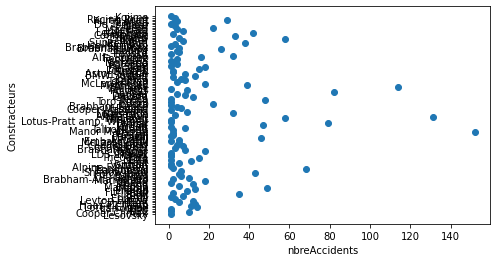

In [18]:
#Représentation graphique de données généralement
plt.scatter(df['nbreAccidents'],df['Constracteurs'])
#Ou Bien plt.scatter(df.nome_conlone,df.nome_conlone)
plt.xlabel('nbreAccidents')
plt.ylabel('Constracteurs')

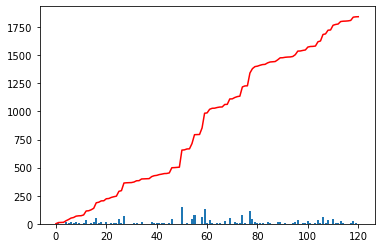

In [49]:
import numpy as np

y = list(const.nbreAccidents)

x = range(len(y))

ycum = np.cumsum(y)

plt.bar(x,y)

plt.plot(x,ycum,"-r")

plt.show()

In [50]:
def pareto(data) :

    from matplotlib.ticker import PercentFormatter

    import numpy as np

    y = list(data)

    x = range(len(data))

    ycum = np.cumsum(y)/sum(y)*100

    fig, ax = plt.subplots()

    ax.bar(x,y,color="yellow")

    ax2 = ax.twinx()

    ax2.plot(x,ycum, color="C1", marker="D", ms=7)

    ax2.axhline(y=80,color="r")

    ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis="y", colors="C0")

    ax2.tick_params(axis="y", colors="C1")

    plt.ylim(0,110)

    plt.show()

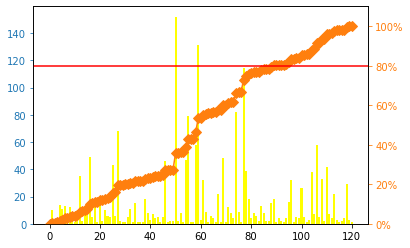

In [51]:
pareto(const.nbreAccidents)

In [52]:
2- Visualiser les résultats de l'ACP

SyntaxError: invalid syntax (Temp/ipykernel_21204/1756061541.py, line 1)

In [53]:
#######################################

# biplot

# version 12/11/2021

#######################################

import matplotlib.pyplot as plt

from scipy.spatial import ConvexHull

import numpy as np

import pandas as pd

import matplotlib as mpl

import matplotlib.cm as cm

import seaborn as sns

from sklearn.decomposition import PCA

def biplot(pca=[],x=None,y=None,components=[0,1],score=None,coeff=None,coeff_labels=None,score_labels=None,circle='T',bigdata=1000,cat=None,cmap="viridis",density=True):

    if isinstance(pca,PCA)==True :

        coeff = np.transpose(pca.components_[components, :])

        score=  pca.fit_transform(x)[:,components]

        if isinstance(x,pd.DataFrame)==True :

            coeff_labels = list(x.columns)

    if score is not None : x = score

    if x.shape[1]>1 :

        xs = x[:,0]

        ys = x[:,1]

    else :

        xs = x

        ys = y

    if (len(xs) != len(ys)) : print("Warning ! x et y n'ont pas la même taille !")

    scalex = 1.0/(xs.max() - xs.min())

    scaley = 1.0/(ys.max() - ys.min())

    #x_c = xs * scalex

    #y_c = ys * scaley

    temp = (xs - xs.min())

    x_c = temp / temp.max() * 2 - 1

    temp = (ys - ys.min())

    y_c = temp / temp.max() * 2 - 1

    data = pd.DataFrame({"x_c":x_c,"y_c":y_c})

    print("Attention : pour des facilités d'affichage, les données sont centrées-réduites")

    if cat is None : cat = [0]*len(xs)

    elif len(pd.Series(cat)) == 1 : cat = list(pd.Series(cat))*len(xs)

    elif len(pd.Series(cat)) != len(xs) : print("Warning ! Nombre anormal de catégories !")

    cat = pd.Series(cat).astype("category")

    fig = plt.figure(figsize=(6,6),facecolor='w') 

    ax = fig.add_subplot(111)

    # Affichage des points

    if (len(xs) < bigdata) :   

        ax.scatter(x_c,y_c, c = cat.cat.codes,cmap=cmap)

        if density==True : print("Warning ! Le mode density actif n'apparait que si BigData est paramétré.")

    # Affichage des nappes convexes (BigData)

    else :

        #color

        norm = mpl.colors.Normalize(vmin=0, vmax=(len(np.unique(cat.cat.codes)))) #-(len(np.unique(c)))

        cmap = cmap

        m = cm.ScalarMappable(norm=norm, cmap=cmap)

        if density==True :

            sns.set_style("white")

            sns.kdeplot(x="x_c",y="y_c",data=data)

            if len(np.unique(cat)) <= 1 :

                sns.kdeplot(x="x_c",y="y_c",data=data, cmap="Blues", shade=True, thresh= 0)

            else :

                for i in np.unique(cat) :

                    color_temp = m.to_rgba(i)

                    sns.kdeplot(x="x_c",y="y_c",data=data[cat==i], color=color_temp,

                                shade=True, thresh=0.25, alpha=0.25)     

        for cat_temp in cat.cat.codes.unique() :

            x_c_temp = [x_c[i] for i in range(len(x_c)) if (cat.cat.codes[i] == cat_temp)]

            y_c_temp = [y_c[i] for i in range(len(y_c)) if (cat.cat.codes[i] == cat_temp)]

            points = [ [ None ] * len(x_c_temp) ] * 2

            points = np.array(points)

            points = points.reshape(len(x_c_temp),2)

            points[:,0] = x_c_temp

            points[:,1] = y_c_temp

            hull = ConvexHull(points)

            temp = 0

            for simplex in hull.simplices:

                color_temp = m.to_rgba(cat_temp)

                plt.plot(points[simplex, 0], points[simplex, 1],color=color_temp)#, linestyle='dashed')#linewidth=2,color=cat)

                if (temp == 0) :

                     plt.xlim(-1,1)

                     plt.ylim(-1,1)

                     temp = temp+1

    if coeff is not None :

        if (circle == 'T') :

            x_circle = np.linspace(-1, 1, 100)

            y_circle = np.linspace(-1, 1, 100)

            X, Y = np.meshgrid(x_circle,y_circle)

            F = X**2 + Y**2 - 1.0

            #fig, ax = plt.subplots()

            plt.contour(X,Y,F,[0])

        n = coeff.shape[0]

        for i in range(n):

            plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5,

                      head_width=0.05, head_length=0.05)

            if coeff_labels is None:

                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')

            else:

                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, coeff_labels[i], color = 'g', ha = 'center', va = 'center')

        if score_labels is not None :

            for i in range(len(score_labels)) :

                temp_x = xs[i] * scalex

                temp_y = ys[i] * scaley

                plt.text(temp_x,temp_y,list(score_labels)[i])

    plt.xlim(-1.2,1.2)

    plt.ylim(-1.2,1.2)

    plt.xlabel("PC{}".format(1))

    plt.ylabel("PC{}".format(2))

    plt.grid(linestyle='--')

    plt.show()


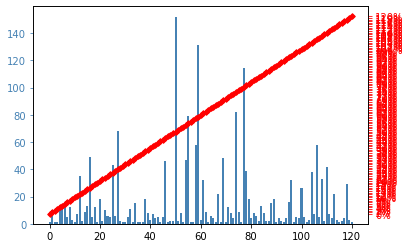

In [54]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df.index, df['nbreAccidents'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df.index, df['Constracteurs'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

In [55]:
# Axes principaux dans l'espace des caractéristiques, représentant les directions de la variance maximale dans les données. Les composantes sont triées par variance expliquée.

print(const.Stops) 

0       1
1      10
2       1
3       1
4      14
       ..
116     2
117     4
118    29
119     3
120     1
Name: Stops, Length: 121, dtype: int64


In [58]:
Atrack = PCA(n_components=3)

In [59]:
Atrack.fit(X)

NameError: name 'X' is not defined